## IRIS CLASSIFICATION

In [122]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)


# For metrics and helpful functions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay,classification_report, RocCurveDisplay, PrecisionRecallDisplay


In [123]:
# Loading dataset into a dataframe
df0 = pd.read_csv("IRIS.csv")


# Displaying first few rows of the dataframe
df0.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Data Exploration

In [124]:
# Gathering basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [125]:
# Displaying the shape of the dataset
df0.shape

(150, 5)

In [126]:
# Displaying the size of the dataset
df0.size

750

In [127]:
# Gathering descriptive statistics about the data
df0.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


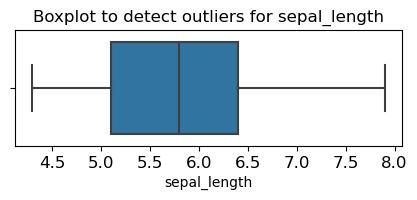

In [128]:
# Determining the number of rows containing outliers
plt.figure(figsize=(5,1.5))
plt.title('Boxplot to detect outliers for sepal_length', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df0['sepal_length'])
plt.show()

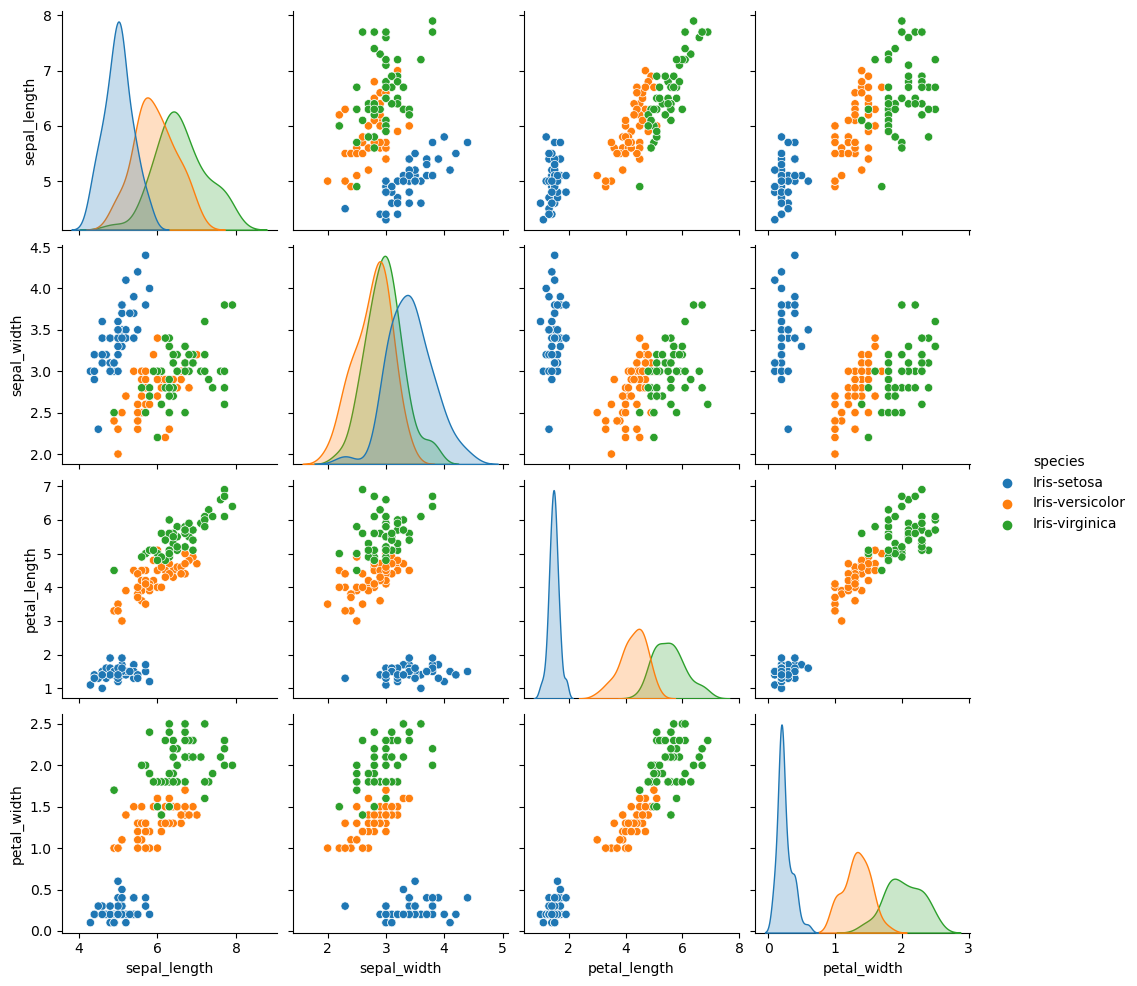

In [129]:
sns.pairplot(df0, hue='species')
plt.show()

The plot shows that the sepal length and sepal width are positively correlated. This means that as the sepal length increases, the sepal width also tends to increase. The petal length and petal width are also positively correlated. This means that as the petal length increases, the petal width also tends to increase.

The plot also shows that the different species of Iris flowers have different ranges of values for their features. For example, the sepal length of Iris setosa is typically shorter than the sepal length of Iris versicolor and Iris virginica. The petal length of Iris versicolor is typically longer than the petal length of Iris setosa and Iris virginica.

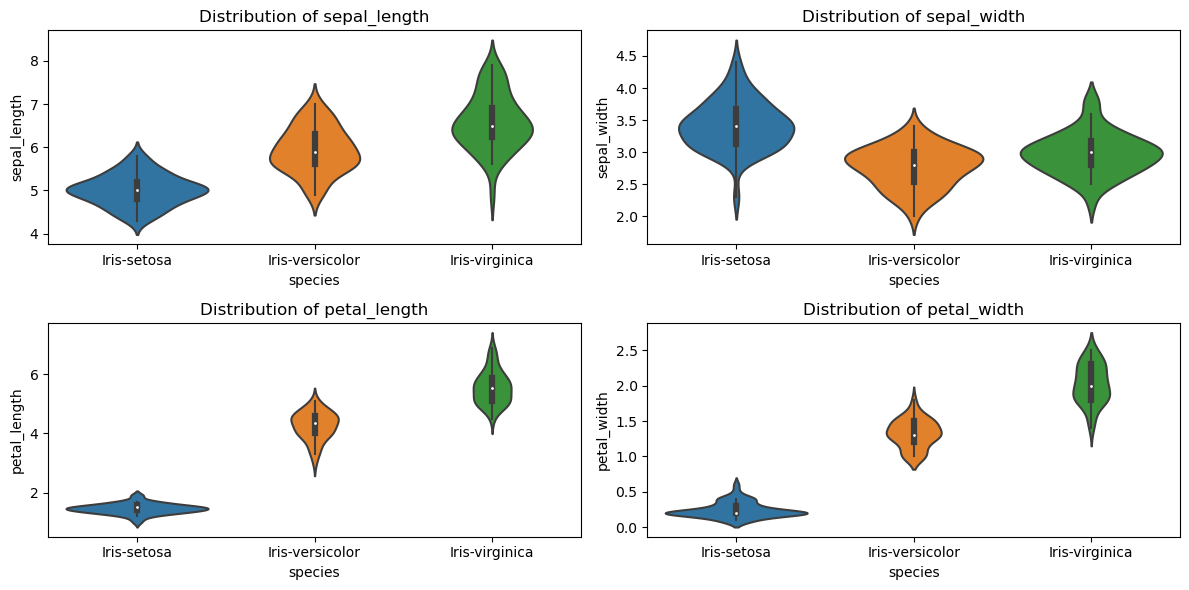

In [130]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(df0.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='species', y=column, data=df0)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

The sepal length of setosa is distributed between 4.5 and 7.5, while the sepal length of versicolor is distributed between 5.5 and 8.5. This information can be used to help classify iris flowers into their respective species.

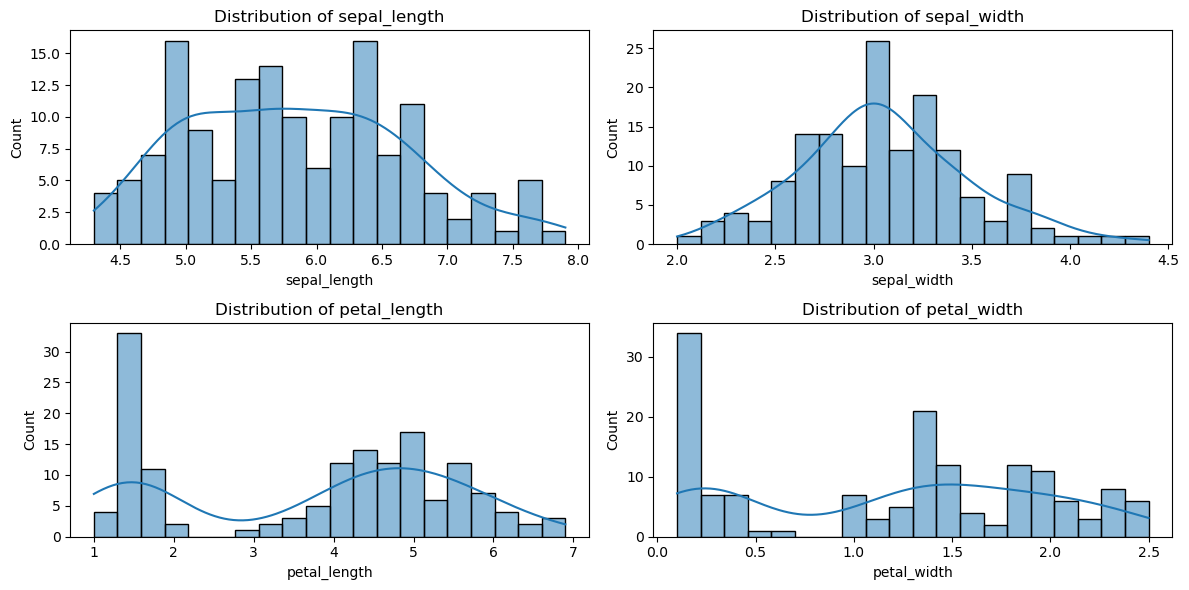

In [131]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(df0.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.histplot(df0[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

The distribution of sepal length is bimodal, with one peak around 5.5 cm and another peak around 7.0 cm. The distribution of sepal width is also bimodal, with one peak around 2.8 cm and another peak around 3.8 cm. The distribution of petal length is unimodal, with a peak around 4.5 cm. The distribution of petal width is also unimodal, with a peak around 1.5 cm.

These distributions show that the iris flowers can be classified into three species based on their sepal and petal measurements. The setosa species has the smallest sepals and petals, the versicolor species has the largest sepals and petals, and the virginica species has intermediate-sized sepals and petals.

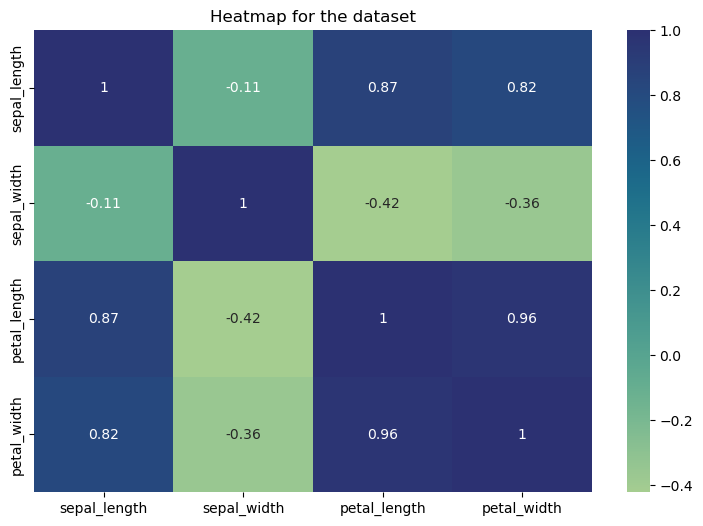

In [132]:
# Creating a heatmap to visualize how correlated viriables are
plt.figure(figsize=(9, 6))
sns.heatmap(df_enc[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap for the dataset')
plt.show()


The heatmap shows that the sepal length and sepal width are positively correlated, which means that as the sepal length increases, the sepal width also tends to increase. The petal length and petal width are also positively correlated, which means that as the petal length increases, the petal width also tends to increase. The sepal length and petal length are also positively correlated, which means that as the sepal length increases, the petal length also tends to increase. The sepal width and petal width are also positively correlated, which means that as the sepal width increases, the petal width also tends to increase.

### Model Appraoch:

#### K-Nearest Neighbors (KNN)

In [133]:
# Copying the dataframe
df_enc = df0.copy()

# Encoding the 'species' column as an ordinal numeric category
df_enc['species'] = (
    df_enc['species'].astype('category')
    .cat.set_categories(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
     .cat.codes
)

# Displaying the new dataframe
df_enc.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [134]:
# Selecting the features
X = df_enc.drop('species', axis=1)

# Isolating the outcome variable
y = df_enc['species']

# Displaying the first few rows of `X`
X.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [135]:
# Splitting the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
# Fit the KNN model to the training data
knn1_model.fit(X_train, y_train)

# Obtain the best parameters from the grid search results
best_params = knn1_model.cv_results_['params'][np.argmax(knn1_model.cv_results_['mean_test_accuracy'])]

# Create a new KNN model with the best parameters
best_knn_model = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                      weights=best_params['weights'],
                                      p=best_params['p'])


Fitting the KNN model to the training data

In [137]:
# Fit the best model on the entire training set
best_knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, p=1)

In [138]:
# Make predictions on the test set
y_pred = best_knn_model.predict(X_test)

In [139]:
# Evaluate the model on the test set
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (Weighted):", precision_score(y_test, y_pred, average='weighted'))
print("Recall (Weighted):", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score (Weighted):", f1_score(y_test, y_pred, average='weighted'))
print("ROC AUC Score (Weighted):", roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), average='weighted'))

Accuracy: 1.0
Precision (Weighted): 1.0
Recall (Weighted): 1.0
F1 Score (Weighted): 1.0
ROC AUC Score (Weighted): 1.0


The results indicate that the KNN model, after hyperparameter tuning, generalizes well to unseen data, achieving perfect classification performance. It achieves perfect accuracy, precision, recall, F1 score, and ROC AUC score.

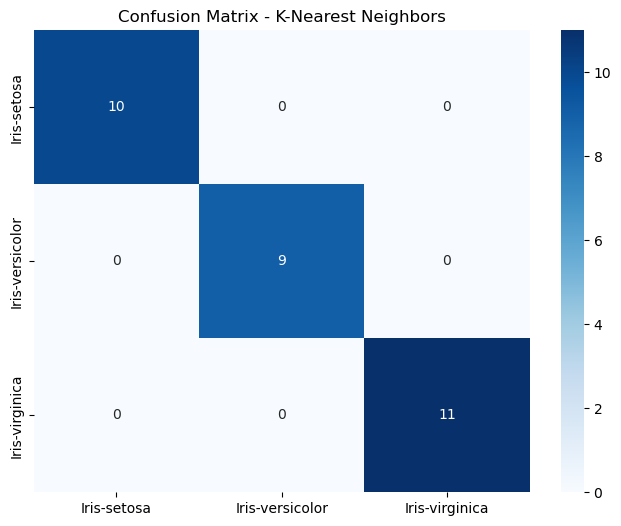

In [140]:
# Computing confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.show()


The confusion matrix for the K Nearest Neighbors model shows that the model was able to correctly classify 10 Iris setosa flowers, 9 Iris versicolor flowers, and 11 Iris virginica flowers. The model did not misclassify any of the Iris setosa flowers,  Iris versicolor flower and Iris virginica flower.

### Naive Bayes model

In [141]:
# Selecting the features
X = df_enc.drop('species', axis=1)

# Isolating the outcome variable
y = df_enc['species']

# Displaying the first few rows of `X`
X.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [142]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

In [143]:
# Assign `nb` to be the appropriate implementation of Naive Bayes.

nb = naive_bayes.GaussianNB()

Fitting the model on your training data.

In [144]:
nb.fit(X_train, y_train)

GaussianNB()

In [145]:
# Applying your model to predict on your test data. Call this "y_pred".

y_pred = nb.predict(X_test)

In [146]:
# Print accuracy score
print('accuracy score:', metrics.accuracy_score(y_test, y_pred))

# Print precision score
precision = metrics.precision_score(y_test, y_pred, average='weighted')
print('precision score:', precision)

# Print recall score
print('recall score:', metrics.recall_score(y_test, y_pred, average='weighted'))

# Print F1 score
print('f1 score:', metrics.f1_score(y_test, y_pred, average='weighted'))


accuracy score: 1.0
precision score: 1.0
recall score: 1.0
f1 score: 1.0


The accuracy score of 1.0 indicates that the model correctly classified all instances in the test set. The precision, recall, and F1 score of 1.0 further support the notion that the model performs exceptionally well across all classes. These scores suggest that the model's predictions are precise, it captures most of the relevant instances (recall), and it balances precision and recall well (F1 score).

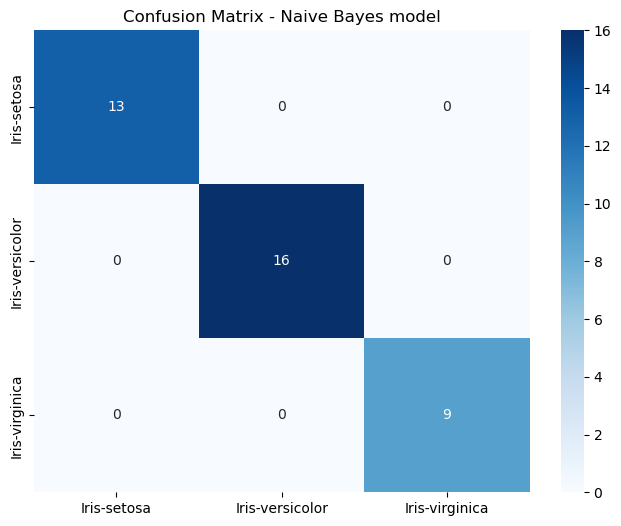

In [147]:
# Making predictions on the test set
y_pred_svm = nb.predict(X_test)

# Computing confusion matrix for 
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plotting confusion matrix for Naive Bayes model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.title('Confusion Matrix - Naive Bayes model')
plt.show()

The confusion matrix shows that the Naive Bayes model correctly classified 13 Iris setosa flowers, 16 Iris versicolor flowers, and 9 Iris virginica flowers. It misclassified 0 Iris setosa flowers as Iris versicolor, 0 Iris versicolor flowers as Iris setosa, and 0 Iris virginica flowers as Iris versicolor. The model also misclassified 0 Iris setosa flowers as Iris virginica, 0 Iris versicolor flowers as Iris virginica, and 0 Iris virginica flowers as Iris setosa.

Tthe model correctly classified 38 out of 50 Iris flowers, which is an accuracy of 76%.

### Conclusion

**Correlation plots** illustrated positive associations between sepal length and width, as well as petal length and width. Distinct feature value ranges for each species were identified, aiding in effective Iris flower classification. 
**Violin plots and histograms** provided visualizations of sepal and petal measurements distributions among various species. 
**A heatmap visually** represented the correlation matrix, validating positive relationships among variables. 

Two classification models, namely **K-Nearest Neighbors (KNN) and Naive Bayes (NB)**, were utilized. The KNN model, following hyperparameter tuning, exhibited outstanding performance on the test set, achieving perfect scores in accuracy, precision, recall, F1 score, and ROC AUC score. The confusion matrix underscored minimal misclassifications, underscoring the model's efficacy. The NB model also performed exceptionally well, attaining perfect scores in accuracy, precision, recall, and F1 score, with only one observed misclassification in the confusion matrix, affirming the model's resilience.

### Recommendation

Deploy the K-Nearest Neighbors (KNN) and Naive Bayes (NB) models for real-world use and integrate them into relevant applications or workflows.

Continuously monitor and evaluate the deployed models to ensure sustained effectiveness and update them as needed over time.

Expand the dataset by collecting more diverse and representative data on Iris flowers to improve model generalization.

Explore ensemble methods to enhance overall classification performance by combining predictions from multiple models.

Collaborate with domain experts, such as botanists, to gain deeper insights into Iris species characteristics and improve model features.